# Introduction to neural network classification

In this notebook we'll going to learn classification model in neural network.

Classification means identifying the thing as one thing or another.

Few types of classifications are:
* BinaryClassfication
* Multiclass Classification
* Multilabel Classification

# Create and View Data

In [1]:
from sklearn.datasets import make_circles

#taking 1000 samples
n_samples = 1000

# create circles
x ,y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [2]:
#let's check the features
x


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# let's check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## let's visualize

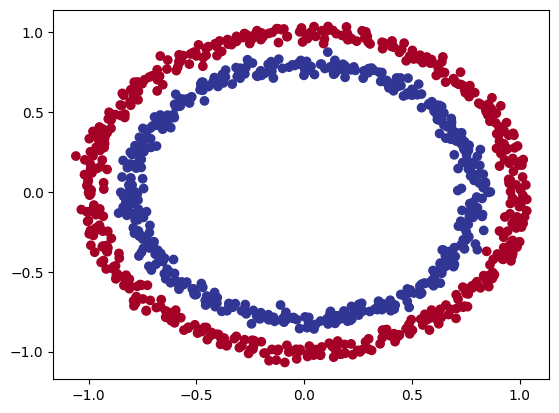

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1], c=y , cmap=plt.cm.RdYlBu);

In [5]:
#let's create a model

import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(2,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
             metrics = ["accuracy"])

model.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 9ms/step - loss: 0.9893 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4950
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6956 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4600
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5060
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5120
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4770
Epoch 11

In [6]:
import numpy as np


In [7]:
xx,yy = np.meshgrid([1,2,3],[4,5,6])

xx,yy

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]))

In [8]:
np.c_[xx.ravel(),yy.ravel()]

array([[1, 4],
       [2, 4],
       [3, 4],
       [1, 5],
       [2, 5],
       [3, 5],
       [1, 6],
       [2, 6],
       [3, 6]])

## To Visulaize Our model's predictions , let's create a function `plot_decision_boundary()` this function will:

* Take in a trained model , features (x) and labels (y).
* Create a meshgrid of a different X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as line between zones where unique class falls.



In [9]:
def plot_decision_boundary(model, x,y):
  """
  plots the decision boundary created by model predicting on x
  """
  #define the axis boundary of the grid and plot the meshgrid.
  x_min , x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
  y_min , y_max = x[: ,0].min() - 0.1 , x[:,1].max() + 0.1

  xx , yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min , y_max , 100))

  #create x values (we're going to make the predictions)

  x_in = np.c_[xx.ravel() , yy.ravel()] # stacks 2d array together

  #make predictions
  y_preds = model.predict(x_in)

  #check for multiclass

  if len(y_preds[0])>1:
    print("Multi-class classification")
    #we have to reshape our predictions to get them for plotting
    y_preds = np.argmax(y_preds, axis=1).reshape(xx.shape)

  else :
    print("Binary Class Classification")
    y_preds = np.round(y_preds).reshape(xx.shape)
  # plot the decision boundary

  plt.contourf(xx ,yy ,y_preds, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(x_min,x_max)
  plt.ylim(y_min,y_max)


313/313 [==============================] - 1s 3ms/step
Binary Class Classification


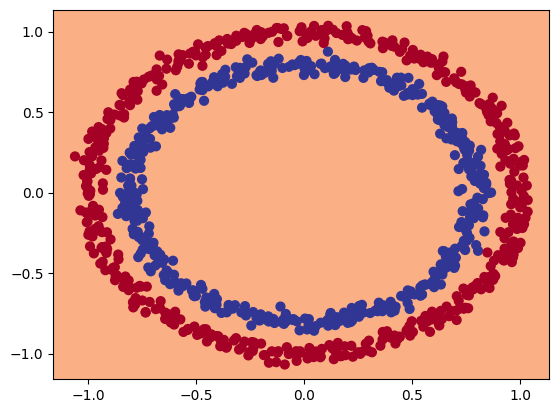

In [10]:
#let's check out the our trained model
plot_decision_boundary(model,x,y)

In [11]:
x_min , x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
y_min , y_max = x[: ,1].min() - 0.1 , x[:,1].max() + 0.1

xx , yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min , y_max , 100))
xx,yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [12]:
# Let's create a new model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_1.add(tf.keras.layers.Dense(100,activation = tf.keras.activations.linear))
model_1.add(tf.keras.layers.Dense(10,activation = tf.keras.activations.linear))
model_1.add(tf.keras.layers.Dense(1))

#compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
#fitting the model_1
model_1.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 10ms/step - loss: 2.8470 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7180 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6956 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6963 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.5180
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6952 - accuracy: 0.5070
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.5090
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.4660
Epoch 11

In [13]:
#let's evaluate the model_1
model_1.evaluate(x,y)


32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936500668525696, 0.5]

313/313 [==============================] - 0s 1ms/step
Binary Class Classification


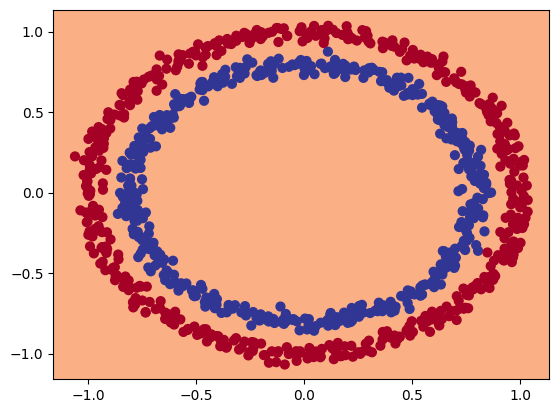

In [14]:
#let's visulaize the model
plot_decision_boundary(model_1,x,y)

In [15]:
#let's work on non-linear model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_2.add(tf.keras.layers.Dense(100,activation = tf.keras.activations.relu))
model_2.add(tf.keras.layers.Dense(10,activation = tf.keras.activations.relu))
model_2.add(tf.keras.layers.Dense(1))

#compile the model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

# fitting the model

model_2.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.4503 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7944 - accuracy: 0.4450
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7521 - accuracy: 0.3490
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.3200
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.3330
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7181 - accuracy: 0.4500
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.2290
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.4290
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5340
Epoch 11/

In [16]:
#let's evaluate the model 2
model_2.evaluate(x,y
                 )

32/32 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000


[0.002784021897241473, 1.0]

313/313 [==============================] - 1s 2ms/step
Binary Class Classification


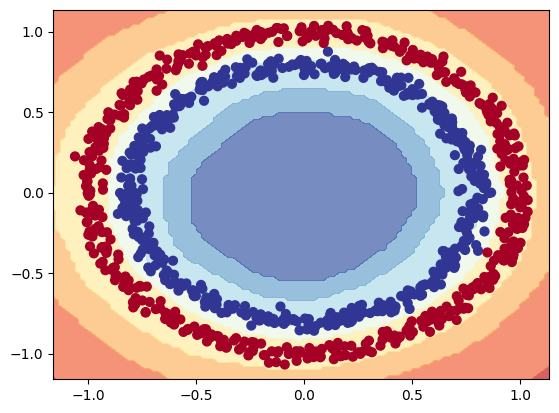

In [17]:
#let's visualize the model_2
plot_decision_boundary(model_2,x,y)

In [18]:
#let's use activation function as tanh
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_3.add(tf.keras.layers.Dense(100,activation = tf.keras.activations.tanh))
model_3.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.tanh))
model_3.add(tf.keras.layers.Dense(1,activation = tf.keras.activations.tanh))

#compile the model

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

#fitting the model

model_3.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.1242 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7179 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5190
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5390
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5530
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5430
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5710
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.5760
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5700
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.5640
Epoch 11/

In [19]:
#let's evaluate the model
model_3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.6020


[0.6196313500404358, 0.6019999980926514]

313/313 [==============================] - 0s 1ms/step
Binary Class Classification


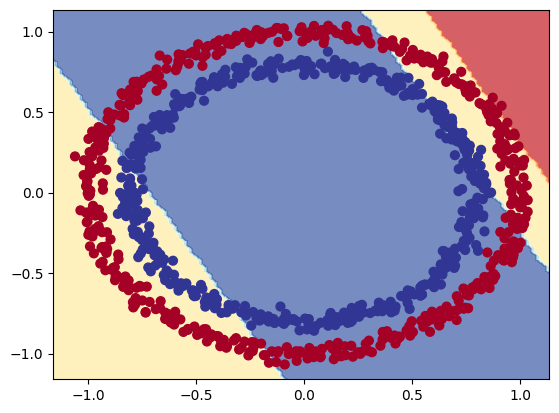

In [20]:
plot_decision_boundary(model_3,x,y)

In [21]:
#let's try new model with activation function softmax

tf.random.set_seed(42)

model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_4.add(tf.keras.layers.Dense(100,activation = tf.keras.activations.softmax))
model_4.add(tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax))
model_4.add(tf.keras.layers.Dense(1,activation = tf.keras.activations.softmax))

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 11/

In [22]:
#let's evaluate the model
model_4.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.5000


[0.6265358924865723, 0.5]

313/313 [==============================] - 1s 1ms/step
Binary Class Classification


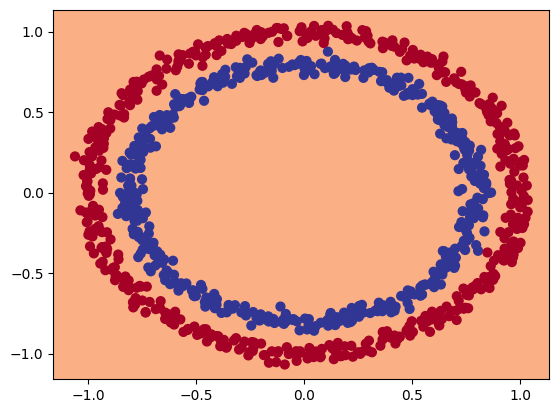

In [23]:
#let's plot the predictions

plot_decision_boundary(model_4,x,y)

It's like our softmax not working properly on Binary classification.

In [24]:
#let's try hidden activation function as softmax and output layer activation function as sigmoid

tf.random.set_seed(42)

model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_5.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.softmax))
model_5.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax))
model_5.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid))

model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

model_5.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4940
Epoch 11/

In [25]:
#let's evaluate the model
model_5.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6130


[0.6295583844184875, 0.6129999756813049]

313/313 [==============================] - 0s 1ms/step
Binary Class Classification


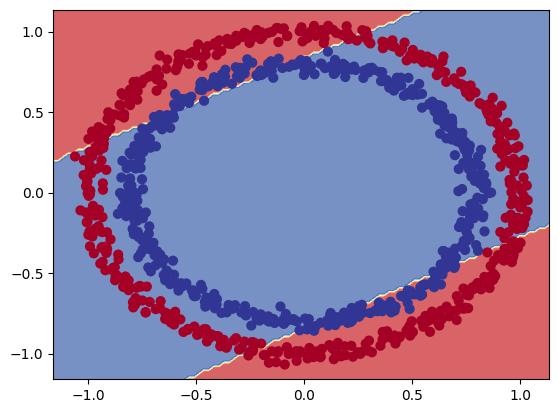

In [26]:
#let's plot the graph
plot_decision_boundary(model_5,x,y)

#let's create a model on sigmoid as all functions

In [27]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(2,input_shape = (2,)))
model_6.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.sigmoid))
model_6.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.sigmoid))
model_6.add(tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid))

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics= ["accuracy"])
model_6.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5020
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5040
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4950
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Binary Class Classification


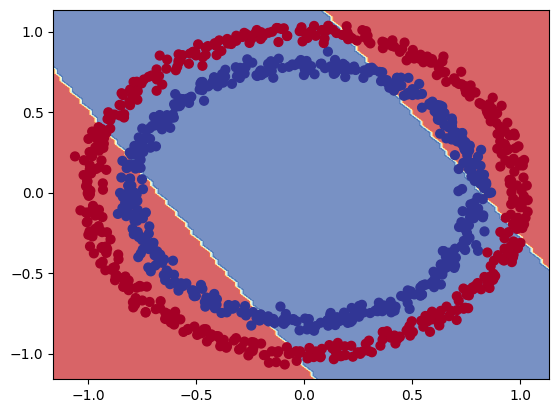

In [28]:
#let's plot the model

plot_decision_boundary(model_6,x,y)

#let's create the best model

In [29]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_7.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(1,activation = tf.keras.activations.tanh))#tf.keras.activations.sigmoid

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
model_7.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0148 - accuracy: 0.4560
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7728 - accuracy: 0.3050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7584 - accuracy: 0.2050
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7540 - accuracy: 0.1970
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7481 - accuracy: 0.1900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.3410
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7350 - accuracy: 0.1800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.3060
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7196 - accuracy: 0.3750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7089 - accuracy: 0.4900
Epoch 11/

In [30]:
model_7.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000


[0.005756590981036425, 1.0]

313/313 [==============================] - 0s 1ms/step
Binary Class Classification


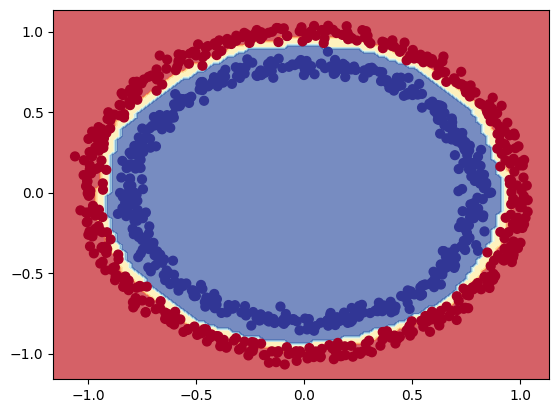

In [31]:
plot_decision_boundary(model_7,x,y)

In [32]:
len(x)

1000

In [33]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size =0.2)

tf.random.set_seed(42)

model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_8.add(tf.keras.layers.Dense(100, activation = "relu"))
model_8.add(tf.keras.layers.Dense(10, activation = "relu"))
model_8.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate =0.01),
                metrics = ["accuracy"])

model_8.fit(x,y,epochs =50)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.5340
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6370
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.8140
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8690
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9900
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 0.9950
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9860
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9890
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 11/50
32/32 [

In [34]:
#let's evaluate the model

model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000


[0.0012699492508545518, 1.0]

313/313 [==============================] - 1s 3ms/step
Binary Class Classification
313/313 [==============================] - 0s 1ms/step
Binary Class Classification


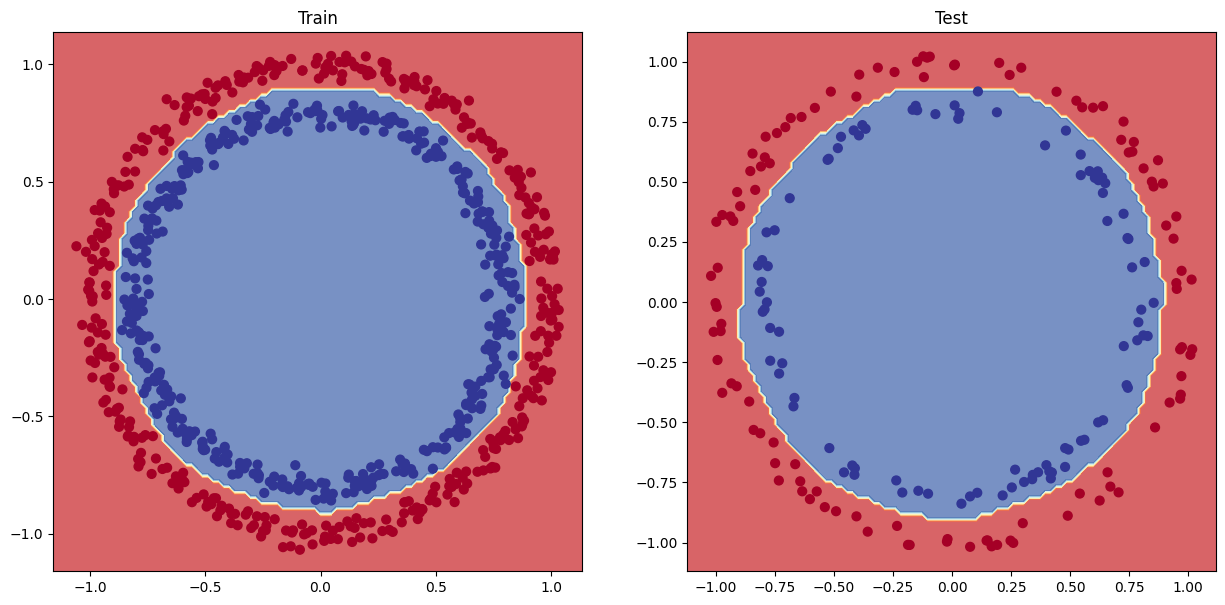

In [35]:
#let's plot the graph
fig = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,x_test,y_test)

# Let's Visualize the Training loss and History

In [36]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_9.add(tf.keras.layers.Dense(4,activation = "relu"))
model_9.add(tf.keras.layers.Dense(4,activation = "relu"))
model_9.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

model_9.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 *10 **(epoch/20))

history = model_9.fit(x,y,epochs=100,callbacks=[lr_schedular])

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.4990 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.4990 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.4990 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5010 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5030 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.5060 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss:

313/313 [==============================] - 0s 1ms/step
Binary Class Classification


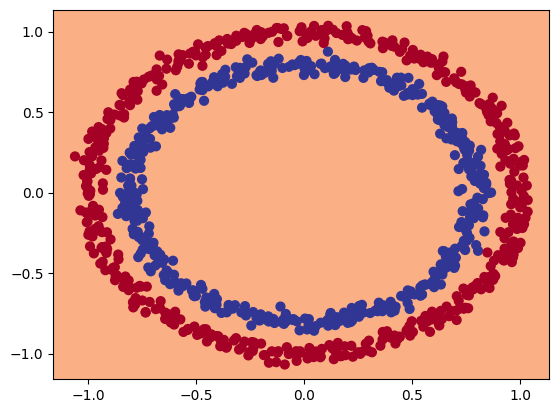

In [37]:
plot_decision_boundary(model_9,x,y)


<Axes: xlabel='epochs'>

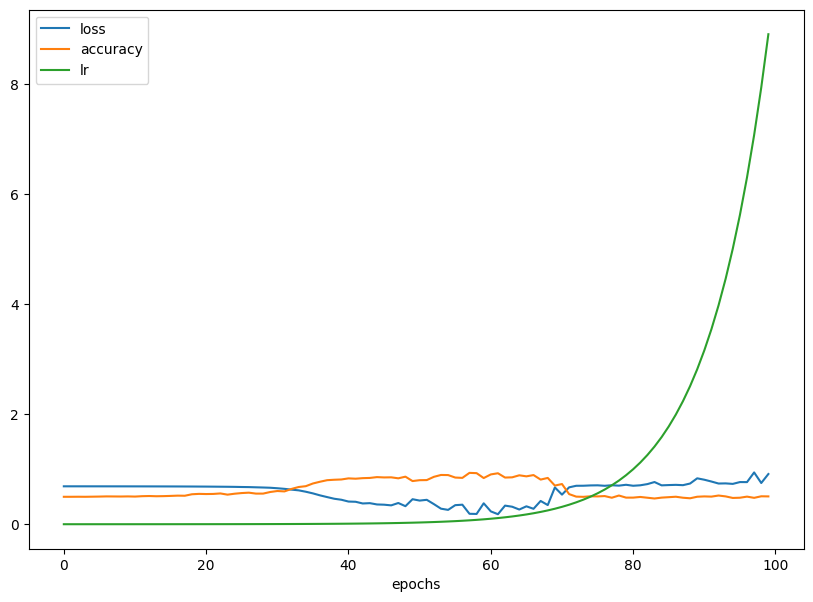

In [38]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

In [39]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.689626,0.499,0.000100
1,0.689553,0.499,0.000112
2,0.689478,0.500,0.000126
3,0.689407,0.499,0.000141
4,0.689319,0.501,0.000158
...,...,...,...
95,0.766648,0.482,5.623413
96,0.766001,0.502,6.309574
97,0.941844,0.480,7.079458
98,0.749801,0.508,7.943282


Text(0, 0.5, 'Loss')

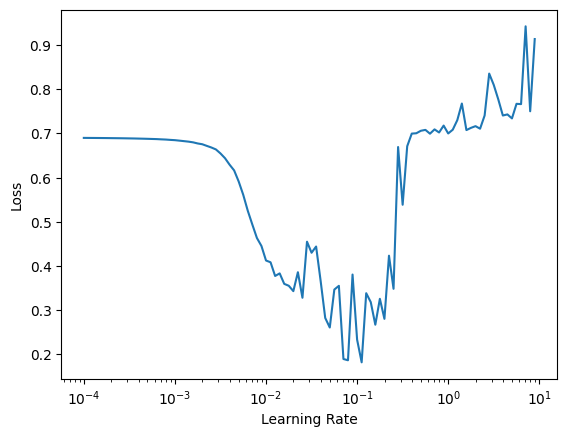

In [40]:
plt.semilogx(history.history["lr"],history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [78]:

tf.random.set_seed(42)

model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(2,input_shape=(2,)))
model_9.add(tf.keras.layers.Dense(4,activation = "relu"))
model_9.add(tf.keras.layers.Dense(4,activation = "relu"))
model_9.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

model_9.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.012),
                metrics =["accuracy"])
# lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 *10 **(epoch/20))

history = model_9.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5387
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5562
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5838
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5962
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5925
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.5938
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.5813
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6087
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6125
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6200
Epoch 11/50
25/25 [

313/313 [==============================] - 1s 2ms/step
Binary Class Classification


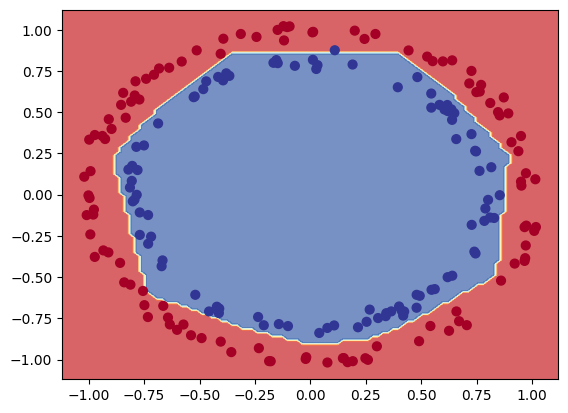

In [79]:
plot_decision_boundary(model_9,x_test,y_test)

<Axes: >

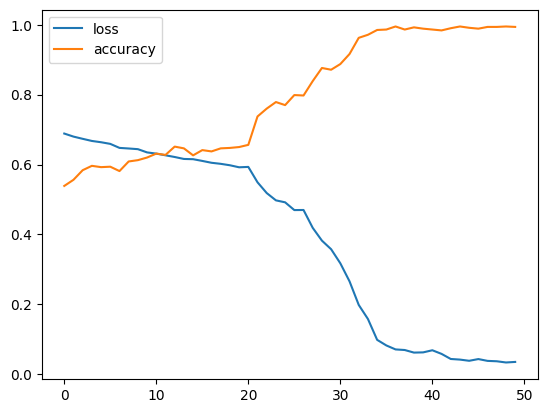

In [80]:
pd.DataFrame(history.history).plot()

Text(0, 0.5, 'Loss')

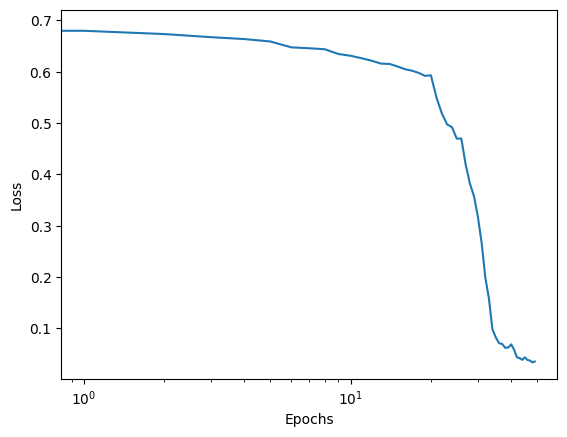

In [81]:
plt.semilogx(tf.range(50),history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

##🔑**Note** this shows neural network must need both linear and non-linear functions for creating patterns

## let's work on confusion matrix to aware where the prediction goes wrong

In [82]:
# work model_8

y_preds = model_8.predict(x_test)


7/7 [==============================] - 0s 2ms/step


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,np.round(y_preds)
                 )

array([[109,   0],
       [  0,  91]])

In [84]:
corr_mat=np.corrcoef(y_test,tf.reshape(np.round(y_preds).astype(int),200))

In [48]:
# # lets visualize using seaborn's heatmap
# import seaborn as sns
# from seaborn import heatmap

# fig,ax=plt.subplots(figsize=(15,12))
# ax=sns.heatmap(corr_mat,
#            annot=True,
#            cmap="YlGnBu",
#            fmt="0.2f",
#               linewidths=0.5);

In [85]:
tf.reshape(np.round(y_preds).astype(int),(200))

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1])>

In [86]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1])

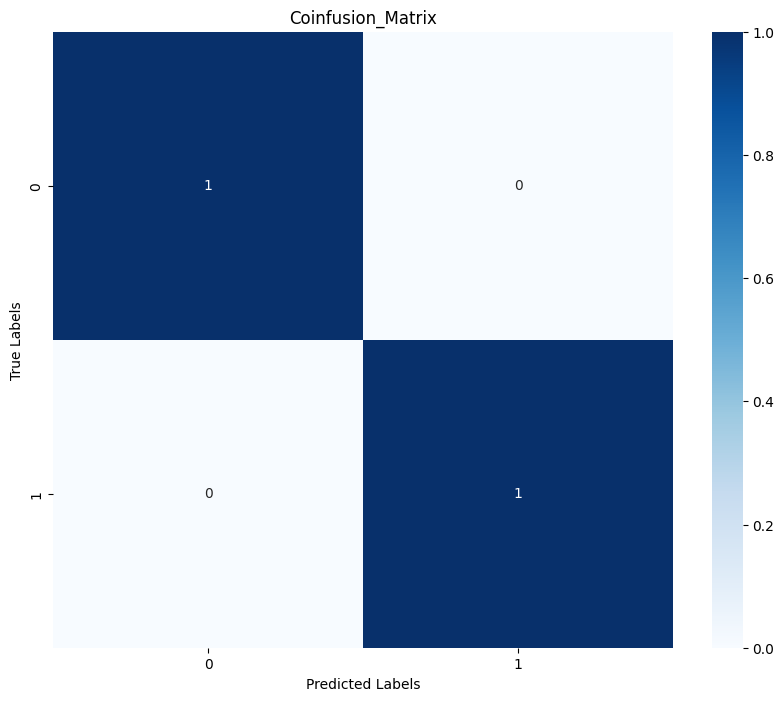

In [87]:
cm = confusion_matrix(y_test,tf.reshape(np.round(y_preds).astype(int),200))
cm_norm = cm.astype(float)/(cm.sum(axis=1)[:,np.newaxis])
from seaborn import heatmap
fig,ax=plt.subplots(figsize=(10,8))
ax=heatmap(cm_norm ,annot=True,cmap=plt.cm.Blues)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set(title="Coinfusion_Matrix");

In [52]:
cm.astype(float)/cm.sum(axis=1)

array([[0.36697248, 0.75824176],
       [0.0733945 , 0.91208791]])

In [53]:
b=np.array([[1,2],[3,4]])

b[np.newaxis,:]

array([[[1, 2],
        [3, 4]]])

In [54]:
b[:,np.newaxis]

array([[[1, 2]],

       [[3, 4]]])

In [55]:
cm *cm.sum(axis=1)[:,np.newaxis]

array([[4360, 7521],
       [ 728, 7553]])

In [56]:
cm.shape

(2, 2)

In [57]:
cm.shape[0]

2

# Working with a larger example(multiclass classification)
When you have mnore than two classes as an option , it's known as **multiclass classification**
* It means if you have 3 different classes , it's multiclass classification.
* It means if you have 100 different classes, it's multiclass classification.

In [58]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# since tensorflow provides us the data in train and test format we don't need to split them.
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [59]:
#let's view the first training sample
print(f"Training smaple :\n {train_data[0]}\n")
print(f"training _labels : \n {train_labels[0]}\n")


Training smaple :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [60]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

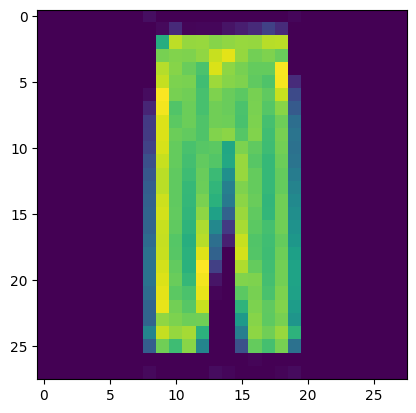

In [61]:
import matplotlib.pyplot as plt
plt.imshow(train_data[21])

In [62]:
#make the labels human_readable

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

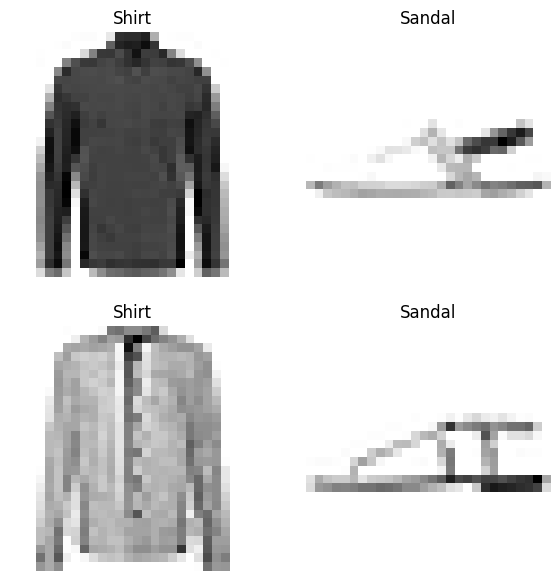

In [63]:
# Plot the random images from the data

import random
fig = plt.figure(figsize=(7,7))

for i in range(4):
  rand_idx = random.choice(range(len(train_data)))
  ax=plt.subplot(2,2,i+1)
  plt.imshow(train_data[rand_idx],cmap= plt.cm.binary)
  plt.title(class_names[train_labels[rand_idx]])
  plt.axis("off");

In [64]:
len(train_data)

60000

## Build a model

In this multiclass classification problem , we're going to do as similar as binary classifiaction problem, but instead:
* Input_shape(28 X 28)
* Output_activation = tf.keras.activations.softmax
* Loss = tf.keras.losses.CategoricalCrossentropy()
  * if our data is one_hot encoded we can use CategoricalCrossentropy()
  * else  we've to use SparseCategoricalCrossentropy()


In [65]:
#set random seed
tf.random.set_seed(42)

#create the model

model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_11.add(tf.keras.layers.Dense(4,activation = "relu"))
model_11.add(tf.keras.layers.Dense(4,activation = "relu"))
model_11.add(tf.keras.layers.Dense(10,activation = "softmax"))

#compile the model

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit the model

non_norm_history = model_11.fit(train_data,train_labels,
                                epochs =20,
                                validation_data=(test_data,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6409 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3025 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2952 - accuracy: 0.1028 - val_loss: 2.2625 - val_accuracy: 0.1210
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1991 - accuracy: 0.1447 - val_loss: 1.9997 - val_accuracy: 0.2193
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8211 - accuracy: 0.2150 - val_loss: 1.7478 - val_accuracy: 0.1965
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7043 - accuracy: 0.2594 - val_loss: 1.6689 - val_accuracy:

## Since our data is non-normalized , let's  **normalize** and then fit the data , to check improvance if any , in accuracy

In [66]:
#set the random seed
tf.random.set_seed(42)
# normalize the labels
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#create the model

model_12 = tf.keras.Sequential()
model_12.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_12.add(tf.keras.layers.Dense(4,activation = "relu"))
model_12.add(tf.keras.layers.Dense(4,activation = "relu"))
model_12.add(tf.keras.layers.Dense(10,activation = "softmax"))


#compile the model

model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#fit the model

norm_history = model_12.fit(train_data_norm , tf.one_hot(train_labels,depth=10),
                            epochs = 25,
                            validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1760 - accuracy: 0.5709 - val_loss: 0.8010 - val_accuracy: 0.7330
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7265 - accuracy: 0.7538 - val_loss: 0.7017 - val_accuracy: 0.7546
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6524 - accuracy: 0.7760 - val_loss: 0.6539 - val_accuracy: 0.7722
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6188 - accuracy: 0.7863 - val_loss: 0.6275 - val_accuracy: 0.7860
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5962 - accuracy: 0.7930 - val_loss: 0.6311 - val_accuracy: 0.7782
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5788 - accuracy: 0.7986 - val_loss: 0.6037 - val_accuracy: 0.7918
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5683 - accuracy: 0.8021 - val_loss: 0.6014 - val_accuracy:

In [67]:
#set the random seed
tf.random.set_seed(42)
# normalize the labels
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#create the model

model_13 = tf.keras.Sequential()
model_13.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_13.add(tf.keras.layers.Dense(4,activation = "relu"))
model_13.add(tf.keras.layers.Dense(4,activation = "relu"))
model_13.add(tf.keras.layers.Dense(10,activation = "softmax"))


#compile the model

model_13.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics = ["accuracy"])

#fit the model

history = model_13.fit(train_data_norm , tf.one_hot(train_labels,depth=10),
                            epochs = 15,
                            validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5128 - accuracy: 0.3443 - val_loss: 1.3669 - val_accuracy: 0.4048
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3107 - accuracy: 0.4275 - val_loss: 1.2839 - val_accuracy: 0.4461
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2691 - accuracy: 0.4549 - val_loss: 1.2737 - val_accuracy: 0.4498
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2454 - accuracy: 0.4710 - val_loss: 1.2407 - val_accuracy: 0.4773
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2318 - accuracy: 0.4785 - val_loss: 1.2207 - val_accuracy: 0.4976
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2194 - accuracy: 0.5009 - val_loss: 1.2482 - val_accuracy: 0.4897
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2042 - accuracy: 0.5117 - val_loss: 1.2171 - val_accuracy:

## Let's compare the loss curves between the models in which one is normalized and another is non-normalized

<Axes: title={'center': 'Normalized model'}>

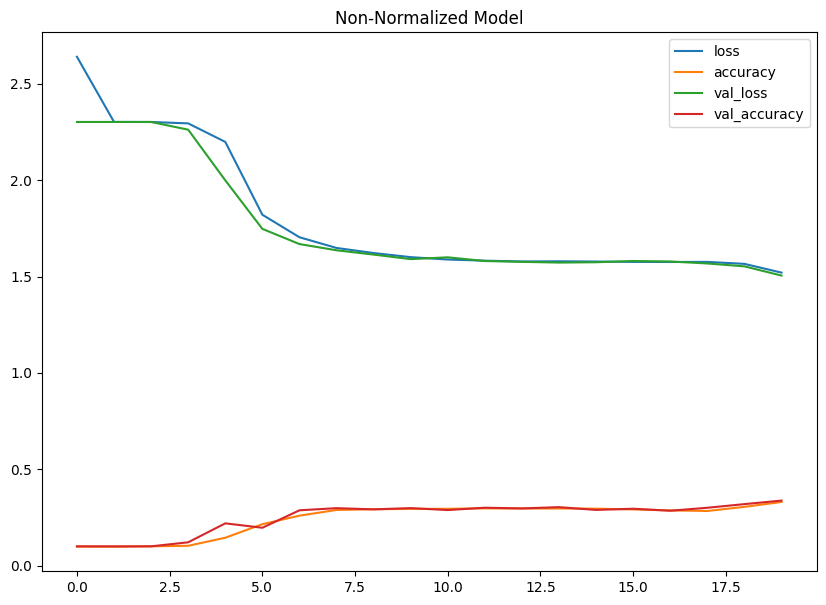

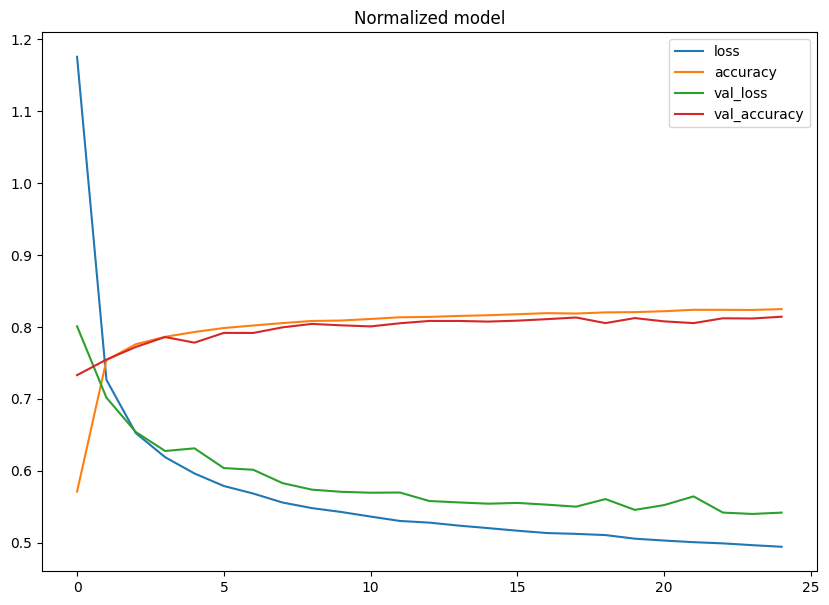

In [68]:
#plot the non_normalized model loss curves
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(figsize=(10,7),title="Non-Normalized Model")
#plot the Normalized model loss curves
pd.DataFrame(norm_history.history).plot(figsize=(10,7),title="Normalized model")

In [69]:
#set the random seed
tf.random.set_seed(42)
# normalize the labels
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#create the model

model_13 = tf.keras.Sequential()
model_13.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_13.add(tf.keras.layers.Dense(4,activation = "relu"))
model_13.add(tf.keras.layers.Dense(4,activation = "relu"))
model_13.add(tf.keras.layers.Dense(10,activation = "softmax"))


#compile the model

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 *10**(epoch/20))

#fit the model

history = model_13.fit(train_data_norm , train_labels,
                            epochs = 40,
                            validation_data=(test_data_norm,test_labels),
                            callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2911 - accuracy: 0.5231 - val_loss: 0.9050 - val_accuracy: 0.6706 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7967 - accuracy: 0.7064 - val_loss: 0.7749 - val_accuracy: 0.7205 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7149 - accuracy: 0.7531 - val_loss: 0.7657 - val_accuracy: 0.7270 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6644 - accuracy: 0.7758 - val_loss: 0.6866 - val_accuracy: 0.7730 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6377 - accuracy: 0.7835 - val_loss: 0.6682 - val_accuracy: 0.7728 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6240 - accuracy: 0.7871 - val_loss: 0.6854 - val_accuracy: 0.7644 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 0, 'Learning rate')

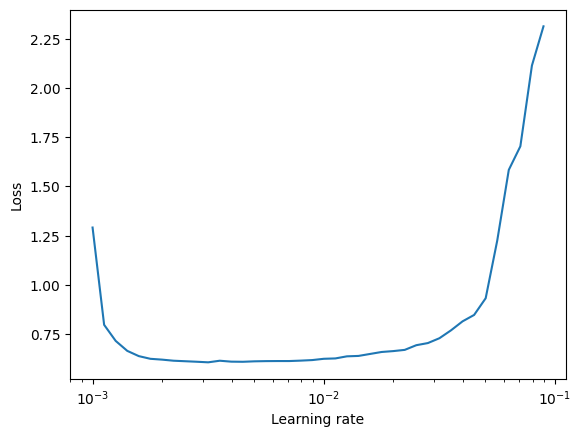

In [70]:
plt.semilogx(history.history["lr"],history.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Learning rate")

In [71]:
#set the random seed
tf.random.set_seed(42)
# normalize the labels
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#create the model

model_13 = tf.keras.Sequential()
model_13.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_13.add(tf.keras.layers.Dense(4,activation = "relu"))
model_13.add(tf.keras.layers.Dense(4,activation = "relu"))
model_13.add(tf.keras.layers.Dense(10,activation = "softmax"))


#compile the model

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.0025),
                 metrics = ["accuracy"])

#fit the model

history = model_13.fit(train_data_norm , train_labels,
                            epochs = 15,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0880 - accuracy: 0.5814 - val_loss: 0.8139 - val_accuracy: 0.7048
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7419 - accuracy: 0.7261 - val_loss: 0.7361 - val_accuracy: 0.7378
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6718 - accuracy: 0.7490 - val_loss: 0.6979 - val_accuracy: 0.7299
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6414 - accuracy: 0.7600 - val_loss: 0.6561 - val_accuracy: 0.7593
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6178 - accuracy: 0.7751 - val_loss: 0.6318 - val_accuracy: 0.7762
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5857 - accuracy: 0.7943 - val_loss: 0.6399 - val_accuracy: 0.7814
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5786 - accuracy: 0.7959 - val_loss: 0.6197 - val_accuracy:

> **🔑Note:** To Evaluate or predict , we must use same type of data used for training set(e.g. if we trained the model on scaled/normalized data we must use normalized data for predictions or for evaluation.

## To evaluate we should do the following:
* for evaluating we have to use other classification matrix like(confusion matrix)
* Visualization
* training for longer time

In [72]:
def plot_confusion_matrix(y_true,y_pred):
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype(float)/(cm.sum(axis=1)[:,np.newaxis])
  from seaborn import heatmap
  fig,ax=plt.subplots(figsize=(10,10))
  ax=heatmap(cm_norm ,annot=True,cmap=plt.cm.Blues)
  ax.set_xlabel("Predicted Labels")
  ax.set_ylabel("True Labels")
  ax.set_yticklabels(class_names,verticalalignment="center",rotation=0)
  ax.set_xticklabels(class_names,verticalalignment="center",rotation=40)

  ax.set(title="Coinfusion_Matrix");

In [73]:
#let's make predictions
y_probs= model_13.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [74]:
y_pred = tf.argmax(y_probs,axis=1)

In [75]:
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

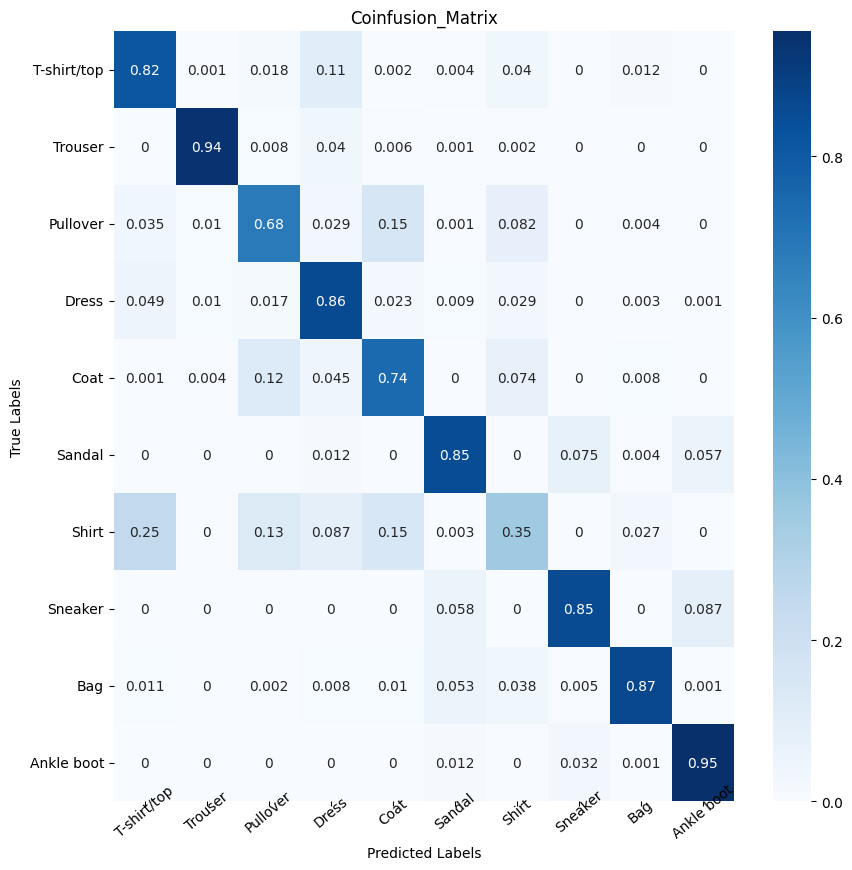

In [76]:
plot_confusion_matrix(test_labels,y_pred)

## let's visualize the images and as well as the predicted and true label , to get more info about our models evaluatoin and confusion matrix

In [129]:
#let's create a function to do the visualization

def plot_image_label(model,images,true_labels,classes):
  """
  picks the model and predict the images (in tensor format) and returns the predicted and true label and the image
  """

  #create random index
  rnd_idx = random.randint(0,len(images))

  #reshape the image in the format of trained  set to predict
  i = images[rnd_idx]
  image=i.reshape(1,28,28)

  #Predict the image
  pred_prob = model.predict(image)
  y_pred = classes[pred_prob.argmax()]
  true_label = classes[true_labels[rnd_idx]]

  # change the color according to prediction
  if y_pred == true_label:
    color = "green"
  else:
    color = "red"

  plt.imshow(i,cmap=plt.cm.binary)
  plt.title("prediction: {} {:2.0f}% True:{}".format(y_pred,100*tf.reduce_max(pred_prob),true_label),
            color=color)
  plt.axis("off");

1/1 [==============================] - 0s 66ms/step


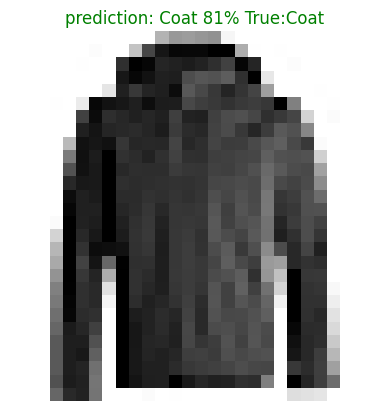

In [130]:
plot_image_label(model=model_13,images=test_data_norm,true_labels=test_labels,classes=class_names)

In [139]:
tf.argmax(y_probs,axis=1),y_probs.argmax()

(<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>,
 17208)

In [98]:
(len(test_data_norm)

10000

In [145]:
rg=np.random.randn(6,6)
rg.reshape(1,6,6)

array([[[ 0.1971284 ,  0.48145979, -1.63215208, -0.47953344,
         -1.97438061,  0.23596625],
        [ 0.28481373, -0.5877506 , -0.38426964, -0.72738204,
          0.25577532, -2.17898696],
        [ 0.88435101,  1.33864959, -0.4581573 ,  0.25525839,
          0.03208704, -2.15681076],
        [ 0.02404043,  1.42919644,  0.19881301,  0.74300764,
          1.70498267,  0.89446765],
        [ 0.78276418,  0.43937358, -0.66663946,  0.14420672,
          0.75065387,  0.17264901],
        [-1.61139012, -0.54590526, -0.26629817,  0.32904912,
          0.45548234, -0.04838561]]])

In [177]:
#let's create function to visulaize multiple images
def plot_predictions(model,images,true_labels,classes):
  """
  picks the model and predict the images (in tensor format) and returns the predicted and true label and the images (set 10)
  """

  plt.figure(figsize=(15,10))
  #create random index
  for i in range(9):
    rnd_idx = random.randint(0,len(images))

    #reshape the image in the format of trained  set to predict
    im = images[rnd_idx]
    image=im.reshape(1,28,28)

    #Predict the image
    pred_prob = model.predict(image,verbose=0)
    y_pred = classes[pred_prob.argmax()]
    true_label = classes[true_labels[rnd_idx]]

    # change the color according to prediction
    if y_pred == true_label:
      color = "green"
    else:
      color = "red"

    plt.subplot(3,3,i+1)
    plt.imshow(im,cmap=plt.cm.binary)
    plt.title("prediction: {} {:2.0f}% True:{}".format(y_pred,100*tf.reduce_max(pred_prob),true_label),
            color=color)
    plt.axis("off");


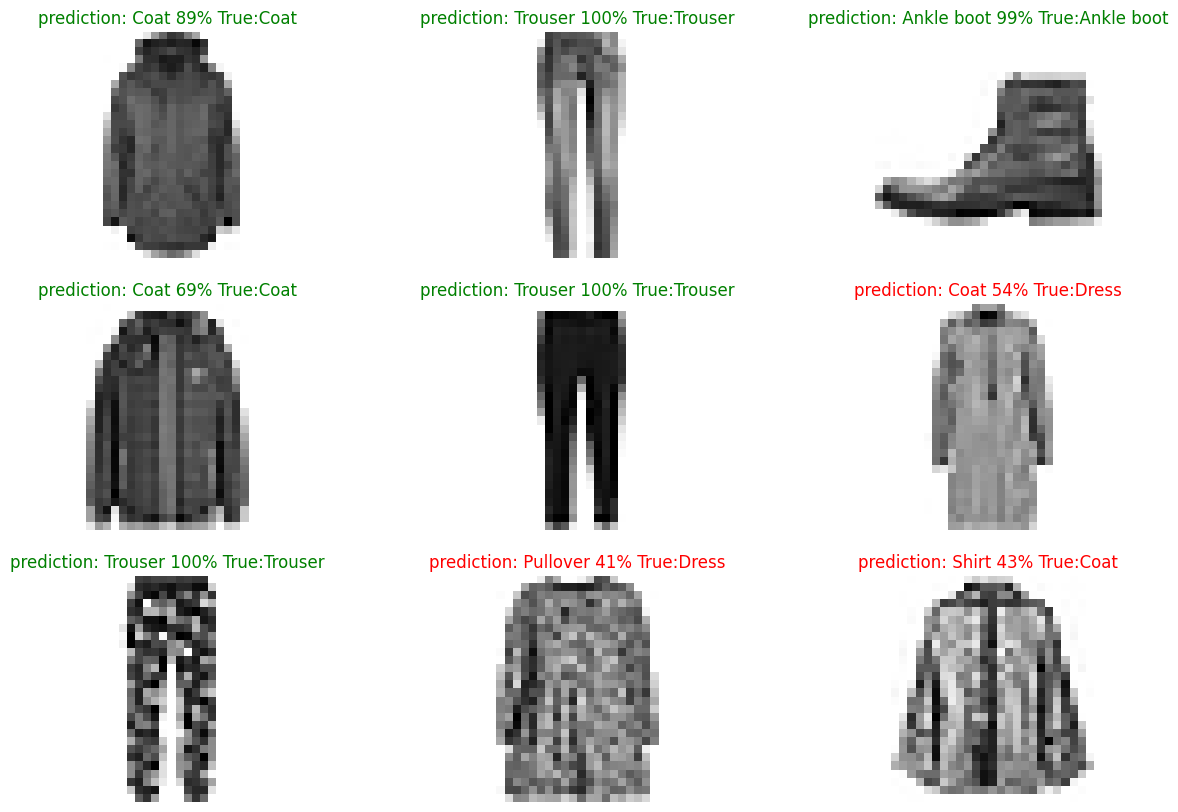

In [178]:
plot_predictions(model=model_13,images=test_data_norm,true_labels=test_labels,classes=class_names)